# AI Reference Notebook

### Table of Contents

* [Chapter 1] Data Generation
    * [Section 1.1] Simple Data Generation
        * [Sub Section 1.1.1] Regression
        * [Sub Section 1.1.2] Classification
    * [Section 1.2] Complex Data Generation
        * [Sub Section 1.2.1] Noise Generation
        * [Sub Section 1.2.1] Recurrence
        * [Sub Section 1.2.1] Application
    * [Section 1.3] Tools
        * [Sub Section 1.3.1] MNIST
        * [Sub Section 1.3.2] SciKit
        * [Sub Section 1.3.3] Numpy
        * [Sub Section 1.3.4] Pandas

* [Chapter 2] Model Building
    * [Section 1.1] Classification
        * [Sub Section 1.1.1] Using Simple Data Generated
        * [Sub Section 1.1.2] Using Complex Data Generated
        * [Sub Section 1.1.2] Using Toolkit Generated Data
    * [Section 1.2] Regression
        * [Sub Section 1.1.1] Using Simple Data Generated
        * [Sub Section 1.1.2] Using Complex Data Generated
        * [Sub Section 1.1.2] Using Toolkit Generated Data

* [Chapter 3] Model Optimization
    * [Section 1.1] Classification
        * [Sub Section 1.1.1] Using Simple Data Generated
        * [Sub Section 1.1.2] Using Complex Data Generated
        * [Sub Section 1.1.2] Using Toolkit Generated Data
    * [Section 1.2] Regression
        * [Sub Section 1.1.1] Using Simple Data Generated
        * [Sub Section 1.1.2] Using Complex Data Generated
        * [Sub Section 1.1.2] Using Toolkit Generated Data       



## Data Generation

# Classification AI

Single Model Base

In [ ]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras import layers
from keras.models import load_model

df = pd.read_csv("Generated Data.csv", index_col="Unnamed: 0")

X = df.copy()[["Inputs 0", "Inputs 1", "Inputs 2", "Inputs 3", "Inputs 4"]]
Y = df.copy()["Output Class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = keras.Sequential(
    [
        layers.Dense(64, activation='relu', input_shape=(5, )),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(11, activation="softmax")
    ]
)

loss = keras.losses.SparseCategoricalCrossentropy()
optim = 'sgd'
metrics = ["accuracy"]

target_batch_size = 256
input_batch_size = len(X_train) // target_batch_size

early_stopping = keras.callbacks.EarlyStopping(
    patience = 5,
    min_delta = 0.001,
    restore_best_weights = True
)

model_chkpt = keras.callbacks.ModelCheckpoint(
    "test_model.hdf5",
    monitor='val_accuracy', 
    verbose=0, 
    save_best_only=True, 
    mode='max'
)

model.compile(loss=loss, optimizer=optim, metrics=metrics)

history = model.fit(X_train, 
                    Y_train, 
                    batch_size=input_batch_size, 
                    epochs=100, 
                    verbose=1, 
                    validation_split = 0.2,
                    validation_data=(X_test, Y_test),
                    callbacks = [model_chkpt])

model = load_model("test_model.hdf5")

plt.plot(history.history["accuracy"], label="Train Acy")
plt.plot(history.history["val_accuracy"], label="Valid Acc")
plt.legend()
plt.show()

Multiple Models Comparison

In [ ]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras import layers
from keras.models import load_model

df = pd.read_csv("Generated Data.csv", index_col="Unnamed: 0")

X = df.copy()[["Inputs 0", "Inputs 1", "Inputs 2", "Inputs 3", "Inputs 4"]]
Y = df.copy()["Output Class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = keras.Sequential(
    [
        layers.Dense(64, activation='relu', input_shape=(5, )),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(11, activation="softmax")
    ]
)

loss = keras.losses.SparseCategoricalCrossentropy()
optim = 'sgd'
metrics = ["accuracy"]

target_batch_size = 256
input_batch_size = len(X_train) // target_batch_size

early_stopping = keras.callbacks.EarlyStopping(
    patience = 5,
    min_delta = 0.001,
    restore_best_weights = True
)

model_chkpt = keras.callbacks.ModelCheckpoint(
    "test_model.hdf5",
    monitor='val_accuracy', 
    verbose=0, 
    save_best_only=True, 
    mode='max'
)

model.compile(loss=loss, optimizer=optim, metrics=metrics)

history = model.fit(X_train, 
                    Y_train, 
                    batch_size=input_batch_size, 
                    epochs=100, 
                    verbose=1, 
                    validation_split = 0.2,
                    validation_data=(X_test, Y_test),
                    callbacks = [model_chkpt])

model = load_model("test_model.hdf5")

plt.plot(history.history["accuracy"], label="Train Acy")
plt.plot(history.history["val_accuracy"], label="Valid Acc")
plt.legend()
plt.show()

Recurring Dataset

In [87]:
d_l = 500000
n_m = 10 

r_X = [x for x in range(d_l)]
r_Y = [x % n_m for x in r_X]

df = pd.DataFrame({
    "Ins" : r_X,
    "Outs" : r_Y
})
temp = df["Outs"]
df


,Ins,Outs
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
499995,499995,5
499996,499996,6
499997,499997,7
499998,499998,8


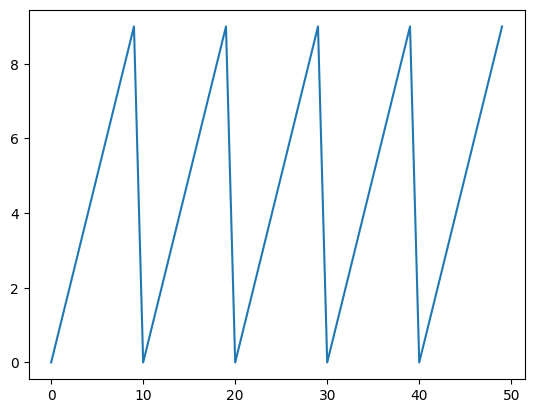

In [100]:
plt.plot(temp[:50])

In [88]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
temp.shape, X1.shape, y1.shape

((500000,), (499995, 5, 1), (499995,))

In [89]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (434995, 5, 1), (434995,))

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential(
    [
    InputLayer((5, 1)),
    LSTM(64),
    #Dense(64),
    Dense(8, activation="relu"),
    Dense(1, activation="linear")
    ]
)

model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [104]:
history = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10


1851/1875 [============================>.] - ETA: 0s - loss: 9.0310 - root_mean_squared_error: 3.0052 - accuracy: 0.1004INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 8s 3ms/step - loss: 8.9673 - root_mean_squared_error: 2.9946 - accuracy: 0.1004 - val_loss: 4.1176 - val_root_mean_squared_error: 2.0292 - val_accuracy: 0.1000
Epoch 2/10
1864/1875 [============================>.] - ETA: 0s - loss: 1.3196 - root_mean_squared_error: 1.1487 - accuracy: 0.1273INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 6s 3ms/step - loss: 1.3120 - root_mean_squared_error: 1.1454 - accuracy: 0.1278 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1298 - val_accuracy: 0.2000
Epoch 3/10
1853/1875 [============================>.] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0486 - accuracy: 0.2000INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0023 - root_mean_squared_error: 0.0484 - accuracy: 0.2000 - val_loss: 4.2320e-05 - val_root_mean_squared_error: 0.0065 - val_accuracy: 0.2000
Epoch 4/10
1856/1875 [============================>.] - ETA: 0s - loss: 1.1244e-05 - root_mean_squared_error: 0.0034 - accuracy: 0.1997INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 6s 3ms/step - loss: 1.1134e-05 - root_mean_squared_error: 0.0033 - accuracy: 0.2000 - val_loss: 3.0498e-07 - val_root_mean_squared_error: 5.5225e-04 - val_accuracy: 0.2000
Epoch 5/10
1854/1875 [============================>.] - ETA: 0s - loss: 4.0965e-08 - root_mean_squared_error: 2.0240e-04 - accuracy: 0.1998INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 6s 3ms/step - loss: 4.0506e-08 - root_mean_squared_error: 2.0126e-04 - accuracy: 0.2000 - val_loss: 9.5138e-12 - val_root_mean_squared_error: 3.0844e-06 - val_accuracy: 0.2000
Epoch 6/10
1851/1875 [============================>.] - ETA: 0s - loss: 1.5048e-12 - root_mean_squared_error: 1.2267e-06 - accuracy: 0.2001INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 6s 3ms/step - loss: 1.4915e-12 - root_mean_squared_error: 1.2213e-06 - accuracy: 0.2000 - val_loss: 2.3915e-13 - val_root_mean_squared_error: 4.8903e-07 - val_accuracy: 0.2000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7700e-05 - root_mean_squared_error: 0.0042 - accuracy: 0.2000 - val_loss: 3.9626e-07 - val_root_mean_squared_error: 6.2949e-04 - val_accuracy: 0.2000
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 6.1947e-09 - root_mean_squared_error: 7.8707e-05 - accuracy: 0.2000 - val_loss: 5.1991e-13 - val_root_mean_squared_error: 7.2105e-07 - val_accuracy: 0.2000
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0209e-05 - root_mean_squared_error: 0.0032 - accuracy: 0.2000 - val_loss: 3.0482e-04 - val_root_mean_squared_error: 0.0175 - val_accuracy: 0.2000
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.7109e-05 - root_

In [105]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [106]:
model1.evaluate(X_test1, y_test1)

13594/13594 [==============================] - 19s 1ms/step - loss: 2.3920e-13 - root_mean_squared_error: 4.8908e-07 - accuracy: 0.2000


[2.391957888269597e-13, 4.890764557785587e-07, 0.1999977082014084]

In [94]:
train_predictions = model1.predict(X_train1).flatten()
#train_predictions = model1.predict(X_train1)
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results
#train_predictions.shape, y_train1.shape

1875/1875 [==============================] - 3s 1ms/step


,Train Predictions,Actuals
0,5.000000e+00,5
1,6.000000e+00,6
2,7.000000e+00,7
3,8.000000e+00,8
4,8.999999e+00,9
...,...,...
59995,1.695007e-07,0
59996,1.000000e+00,1
59997,2.000000e+00,2
59998,3.000000e+00,3


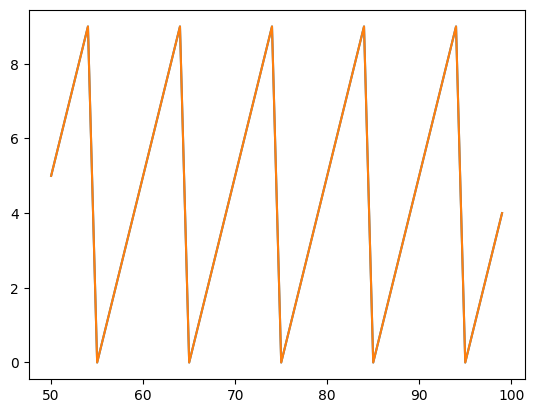

In [95]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [96]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 0s 1ms/step


,Val Predictions,Actuals
0,5.000000e+00,5
1,6.000000e+00,6
2,7.000000e+00,7
3,8.000000e+00,8
4,8.999999e+00,9
...,...,...
4995,1.695007e-07,0
4996,1.000000e+00,1
4997,2.000000e+00,2
4998,3.000000e+00,3


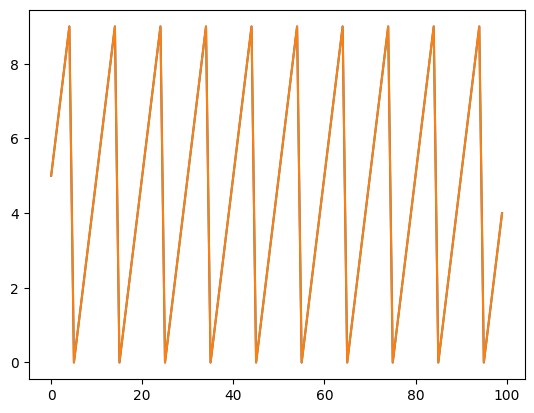

In [97]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [98]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

    1/13594 [..............................] - ETA: 5:02

13594/13594 [==============================] - 17s 1ms/step


,Test Predictions,Actuals
0,5.000000,5
1,6.000000,6
2,7.000000,7
3,8.000000,8
4,8.999999,9
...,...,...
434990,5.000000,5
434991,6.000000,6
434992,7.000000,7
434993,8.000000,8


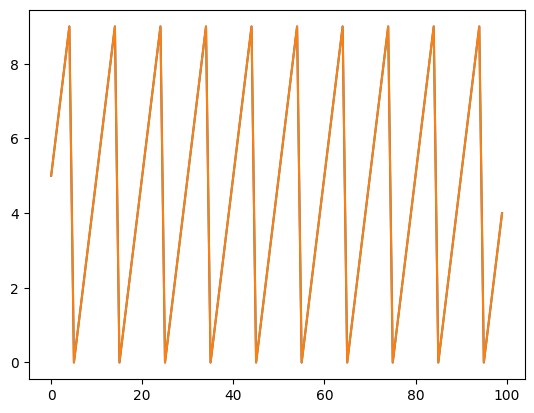

In [99]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])